In [2]:
%tensorflow_version 2.x

In [3]:
from google.colab import drive #toimport google drive data

In [5]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd /content/drive/"My Drive/"

/content/drive/My Drive


In [7]:
cd "Project Dataset/"

/content/drive/My Drive/Project Dataset


In [8]:
ls

dataset/


In [9]:
#load basic libraries
import pandas as pd
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [10]:
df = pd.read_csv('dataset/Tagrecommendation.csv') #loading csv file

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id', 'tags',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'title', 'body'],
      dtype='object')

In [ ]:
tags=df['tags']

In [ ]:
body=df['body']

In [ ]:
title=df['title']

In [ ]:
title[2]

"How do I calculate someone's age in C#?"

In [ ]:
tags[2]

'<c#><.net><datetime>'

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8 MB 52 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617772 sha256=d20766d3ea42ce59152c68e7cd8a5c54391fcc14997b917f037f2f1779b3ef4b
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Standard Libraries
import pandas as pd
import numpy as np
import json

# Data Preprocessing & NLP
import nltk
import re
import string
import gensim
from textblob import Word

from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('wordnet')
nltk.download('punkt')

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import linear_kernel

# Performance metrics
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()
def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id', 'tags',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'title', 'body'],
      dtype='object')

In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=df.drop(labels = ['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'body'], axis=1)

In [ ]:
data_raw = df.iloc[:2000,]
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 2000
Number of columns in data = 2


**Sample data:**


,tags,title
0,<c#><floating-point><type-conversion><double><...,Convert Decimal to Double?
1,<html><css><css3><internet-explorer-7>,Percentage width child element in absolutely p...
2,<c#><.net><datetime>,How do I calculate someone's age in C#?
3,<c#><datetime><time><datediff><relative-time-s...,Calculate relative time in C#
4,<javascript><html><browser><timezone><timezone...,Determine a User's Timezone


In [ ]:
for i in range(len(data_raw)):
  tags=[]
  tg=data_raw['tags'][i].split('>')
  for k in range(len(tg)-1):
    tags.append(tg[k].replace('<',''))
  data_raw['tags'][i]=tags

In [ ]:
data_raw

,tags,title
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone
...,...,...
1995,"[.net, reflection, access-modifiers]",Do access modifiers affect reflection also?
1996,"[sql, sql-server, sql-server-2005]",How to insert multiple records and get the ide...
1997,[asp.net],Get URL of ASP.Net Page in code-behind
1998,[asp.net],How to click a button on an ASP.NET web page p...


In [ ]:
# Data Cleaning & Preprocessing techniques
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [ ]:
import re
# creating clean text feature
features = ['title']
for feature in features:
    data_raw['clean_' + feature] = data_raw[feature].apply(clean_text)

In [ ]:
data_raw

,tags,title,clean_title
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?,convert decimal to double
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...,percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?,how do i calculate someone s age in c
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#,calculate relative time in c
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone,determine a user s timezone
...,...,...,...
1995,"[.net, reflection, access-modifiers]",Do access modifiers affect reflection also?,do access modifiers affect reflection also
1996,"[sql, sql-server, sql-server-2005]",How to insert multiple records and get the ide...,how to insert multiple records and get the ide...
1997,[asp.net],Get URL of ASP.Net Page in code-behind,get url of asp net page in code behind
1998,[asp.net],How to click a button on an ASP.NET web page p...,how to click a button on an asp net web page p...


In [ ]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    freq_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
    
    fig = plt.figure(figsize=(21,16))
    ax1 = fig.add_subplot(2,1,1)
    wordcloud = WordCloud(width=1000, height=300, background_color='black', 
                          max_words=1628, relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False).generate_from_frequencies(freq_dist)
    
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    
    # select top 20 most frequent word
    ax2 = fig.add_subplot(2,1,2)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('BuGn_r'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()

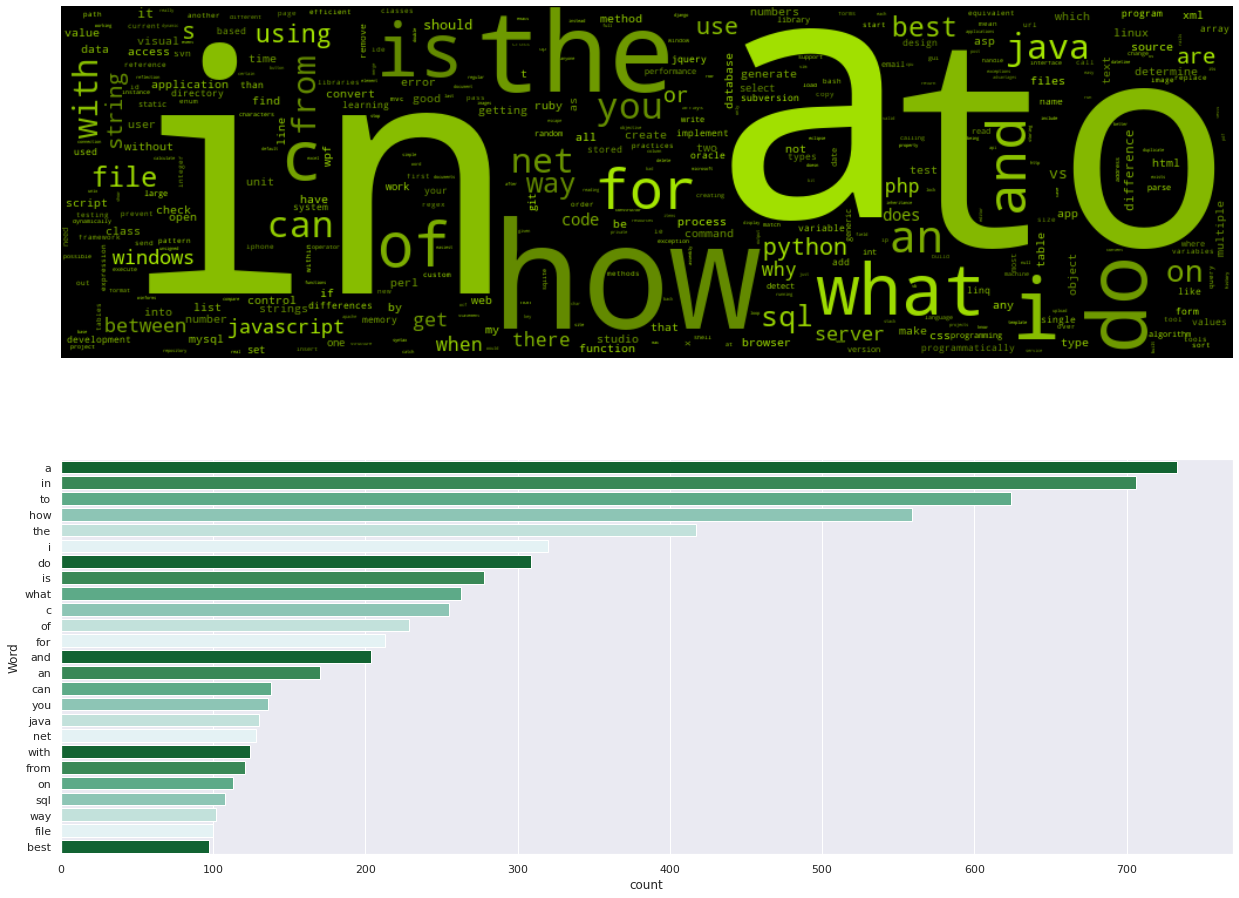

In [ ]:
freq_words(data_raw['clean_title'], 25)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# stopwords-to compare text data with and without stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
data_raw['clean_title'] = data_raw['clean_title'].apply(lambda x: remove_stopwords(x))

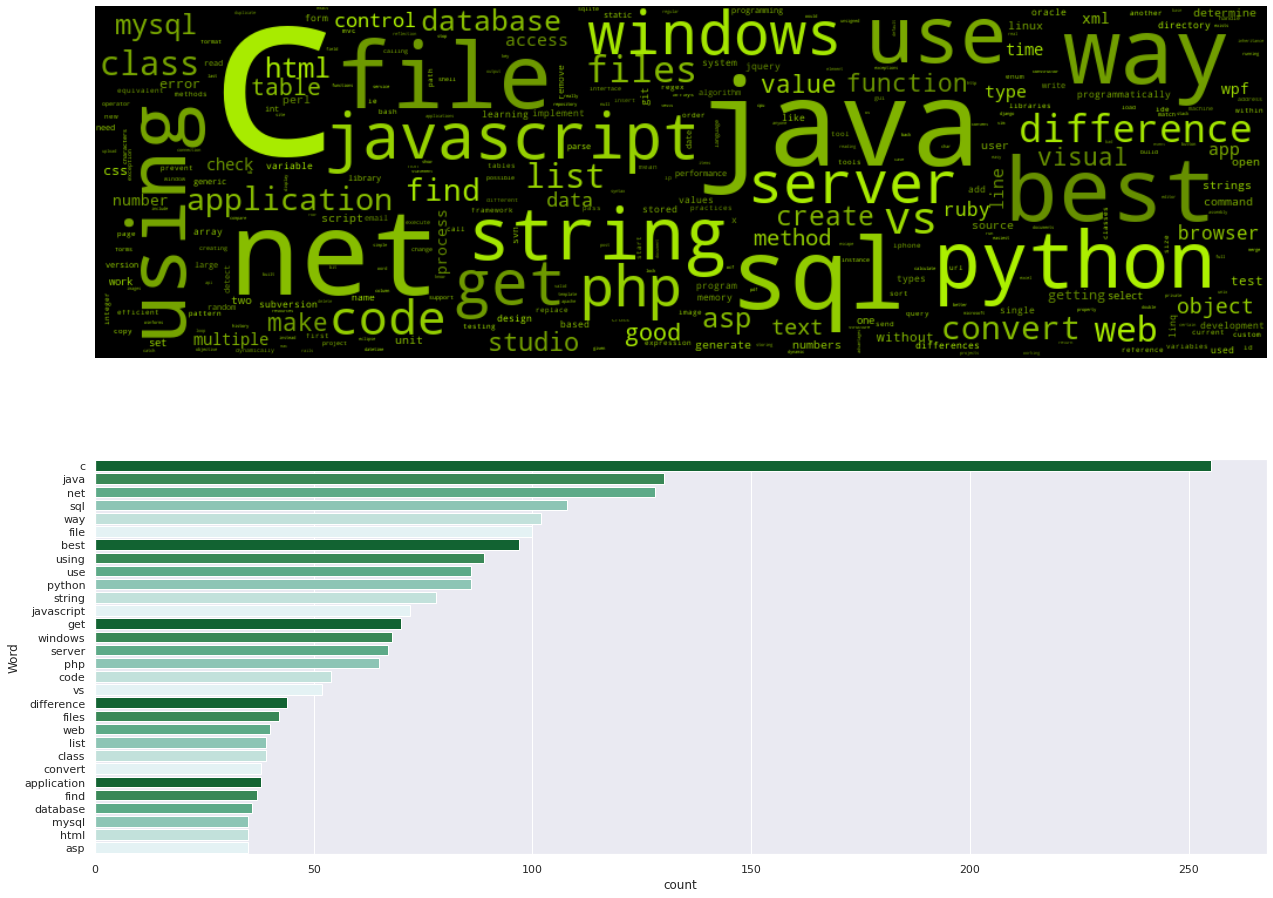

In [ ]:
freq_words(data_raw['clean_title'], 30)

In [ ]:
# get all genre tags in a list
all_tags = sum(data_raw['tags'],[])
len(set(all_tags))

1477

In [ ]:
all_tags = nltk.FreqDist(all_tags)
all_tags_df = pd.DataFrame({'Tag': list(all_tags.keys()), 'Count': list(all_tags.values())})


In [ ]:
sorted_tags = all_tags_df.sort_values(by='Count', ascending=False)
sorted_tags.head(40)

,Tag,Count
0,c#,327
9,.net,239
49,java,176
85,c++,132
102,python,125
14,javascript,120
24,sql,94
28,php,89
25,sql-server,87
175,c,70


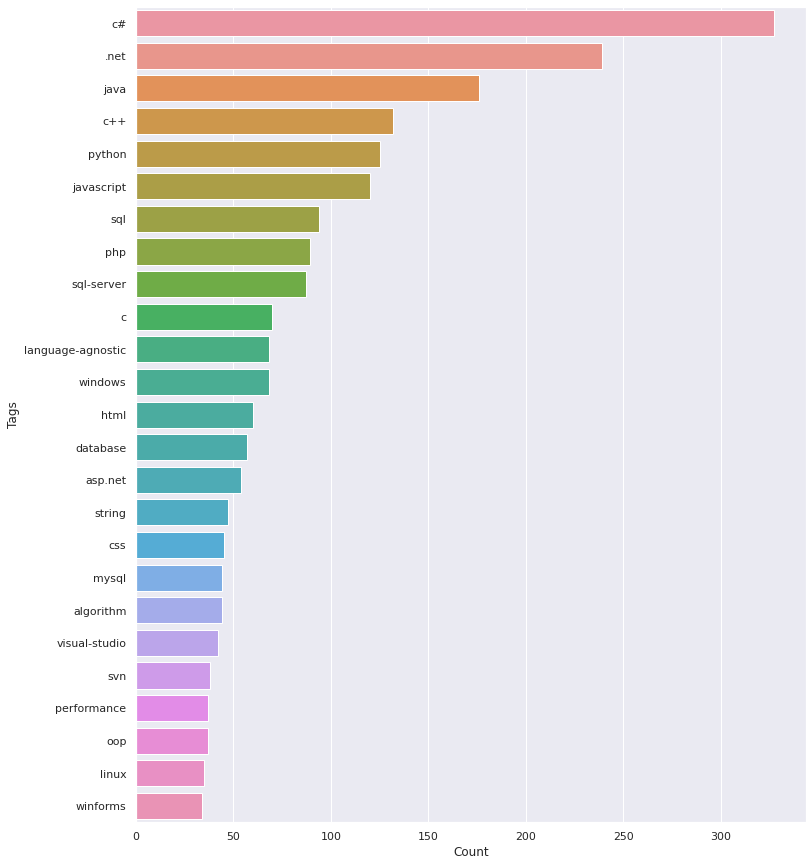

In [ ]:

g = all_tags_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Tag")
ax.set(ylabel = 'Tags')
plt.show()

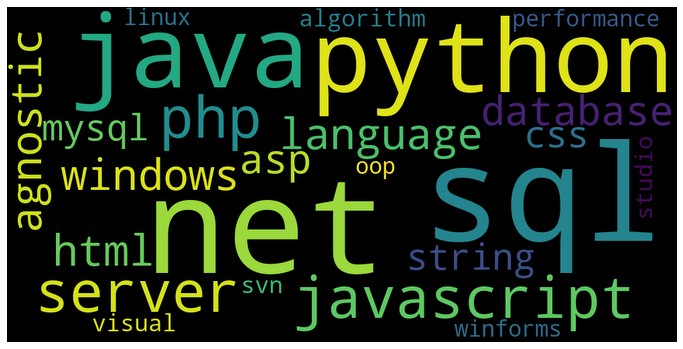

In [ ]:
text = " ".join(review for review in g.Tag)
wordcloud = WordCloud(width=1000, height=500,max_font_size=200).generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

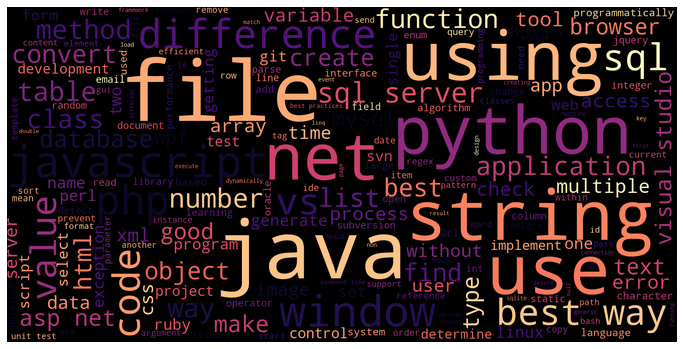

In [ ]:
text = " ".join(review for review in data_raw.clean_title)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [ ]:
#Text Mining Algorithms

In [ ]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [ ]:
# Defining a Count Vectorizer object
count_vec = CountVectorizer(stop_words='english', max_features=10000)
# Defining a TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), tokenizer=tokenize_and_lemmatize, max_features=10000, use_idf=True)

In [ ]:
data_raw.columns

Index(['tags', 'title', 'clean_title'], dtype='object')

In [ ]:
mb = MultiLabelBinarizer()
mb.fit(data_raw['tags'])

y = mb.transform(data_raw['tags'])

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_raw['clean_title'], y, test_size=0.20, random_state=42)

In [ ]:
# Tf-Idf transformation 
xtrain_tfidf = tfidf_vec.fit_transform(X_train)
xtest_tfidf = tfidf_vec.transform(X_test)
xtrain_tfidf.shape

(1600, 7416)

In [ ]:
# Count Vectorizer transformation
xtrain_cv = count_vec.fit_transform(X_train)
xtest_cv = count_vec.transform(X_test)

In [ ]:
xtrain_cv.shape


(1600, 2277)

In [ ]:
evaluation_list=[]


In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
oneVsRest = OneVsRestClassifier(log_reg)
oneVsRest.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest.predict(xtest_tfidf)

def get_performance(y_test, y_pred):
    # Evaluate Performance
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    return accuracy, precision, recall, f1score

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 5.0
Precision : 0.9166666666666666
Recall    : 0.054500412881915775
F1-score   : 0.102883865939205


In [ ]:
import timeit 

In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)


Title:  How to sort strings in JavaScript 
Predicted tag:  [('javascript',)]
Actual tag:  ['javascript', 'string'] 

Title:  How can I represent an 'Enum' in Python? 
Predicted tag:  [('python',)]
Actual tag:  ['python', 'python-3.x', 'enums'] 

Time:  0.14621757340000271


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),
        ('time',round(times,3))
     ]))

In [ ]:
#Multinomial Naive Bayes
nbayes = MultinomialNB()
oneVsRest_nb = OneVsRestClassifier(nbayes)
oneVsRest_nb.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest_nb.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 0.0
Precision : 0.0
Recall    : 0.0
F1-score   : 0.0


In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest_nb.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)

Time:  0.2697902574000011


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Multinomial Naive Bayes'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),('time',round(times,3))
     ]))

In [ ]:
#Linear SVC
linear_svc = LinearSVC()
oneVsRest_svc = OneVsRestClassifier(linear_svc)
oneVsRest_svc.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest_svc.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 45.0
Precision : 0.7959697732997482
Recall    : 0.26094137076796037
F1-score   : 0.39303482587064675


In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest_svc.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)

Title:  Is there a performance difference between i++ and ++i in C? 
Predicted tag:  [('c++', 'oop', 'performance', 'post-increment', 'pre-increment')]
Actual tag:  ['c', 'performance', 'optimization', 'post-increment', 'pre-increment'] 

Title:  C# driver development? 
Predicted tag:  [('c#', 'c++')]
Actual tag:  ['c#', 'kernel', 'drivers', 'device'] 

Title:  Good refactoring support for C++ 
Predicted tag:  [('c#',)]
Actual tag:  ['c++', 'visual-studio', 'refactoring'] 

Title:  What is WCF in simple terms? 
Predicted tag:  [('wcf',)]
Actual tag:  ['.net', 'wcf'] 

Title:  Tactics for using PHP in a high-load site 
Predicted tag:  [('php',)]
Actual tag:  ['php', 'performance', 'high-load'] 

Title:  How do I add FTP support to Eclipse? 
Predicted tag:  [('eclipse',)]
Actual tag:  ['eclipse', 'ftp', 'eclipse-pdt'] 

Title:  Good refactoring support for C++ 
Predicted tag:  [('c#',)]
Actual tag:  ['c++', 'visual-studio', 'refactoring'] 

Title:  How to setup access control in SVN? 
Pr

In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Linear Support vector machine'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),    ('time',round(times,3))

     ]))

In [ ]:
#Random Forest
rforest = RandomForestClassifier(n_estimators=100)
oneVsRest_rf = OneVsRestClassifier(rforest)
oneVsRest_rf.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

In [ ]:
y_pred = oneVsRest_rf.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 10.0
Precision : 0.8461538461538461
Recall    : 0.10900082576383155
F1-score   : 0.19312362838332117


In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest_rf.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)

Title:  How to Detect if I'm Compiling Code With Visual Studio 2008? 
Predicted tag:  [('c#', 'visual-studio')]
Actual tag:  ['c++', 'visual-studio', 'visual-studio-2008'] 

Title:  Learning .NET 
Predicted tag:  [('.net',)]
Actual tag:  ['c#', '.net'] 

Title:  How do I perform an IF...THEN in an SQL SELECT? 
Predicted tag:  [('sql',)]
Actual tag:  ['sql', 'sql-server', 'tsql', 'if-statement', 'case'] 

Title:  Can I get more than 1000 records from a DirectorySearcher in ASP.NET? 
Predicted tag:  [('asp.net',)]
Actual tag:  ['c#', 'asp.net', 'active-directory'] 

Title:  What advantages does jQuery have over other JavaScript libraries? 
Predicted tag:  [('javascript',)]
Actual tag:  ['javascript', 'jquery', 'mootools', 'yui', 'prototypejs'] 

Title:  What are the benefits of the Iterator interface in Java? 
Predicted tag:  [('java',)]
Actual tag:  ['java', 'oop', 'collections', 'interface', 'iterator'] 

Title:  How do you pack a visual studio c++ project for release? 
Predicted tag: 

In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'RandomForestClassifier'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),    ('time',round(times,3))
     ]))

In [ ]:
results = pd.DataFrame(data=evaluation_list)
results = results[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1','time']]
results = results.sort_values(by='Test Accuracy', ascending=False)
results = results.set_index('Model')
results

In [ ]:
results

,Test Accuracy,Precision,Recall,F1,time
Model,,,,,
Linear Support vector machine,45.0,0.80,0.26,0.39,0.218
RandomForestClassifier,10.0,0.85,0.11,0.19,18.489
Logistic Regression,5.0,0.92,0.05,0.10,0.146
Multinomial Naive Bayes,0.0,0.00,0.00,0.00,0.270


In [ ]:
#optimization Grid-Search
param = {'estimator__penalty':['l1', 'l2'], 'estimator__C':[0.001, 0.01, 1, 10]}

In [ ]:
oneVsRest.get_params().keys()


dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [ ]:
# GridSearchCV
kf=KFold(n_splits=10, shuffle=True, random_state=55)
lr_grid = GridSearchCV(oneVsRest, param_grid = param, cv = kf, scoring='f1_micro', n_jobs=-1)
lr_grid.fit(xtrain_tfidf, y_train)

In [ ]:
# examine the best model
print(lr_grid.best_score_)
print(lr_grid.best_params_)
print(lr_grid.best_estimator_)

0.34830243805070094
{'estimator__C': 10, 'estimator__penalty': 'l2'}
OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)


In [ ]:
# Optimized Logistic Regression Model
log_reg = LogisticRegression(C=10, penalty='l2')
ovr = OneVsRestClassifier(log_reg)
ovr.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:

# performance metrics of the optimized model
y_pred = ovr.predict(xtest_tfidf)

accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 66.5
Precision : 0.7664613927048792
Recall    : 0.26989157631359467
F1-score   : 0.39921046138662725
